## Notebook to create new map and locate different points

In [11]:
from PIL import Image
import PIL
import numpy as np
import random
import csv

random.seed(0)

w, h = 1000, 1000
data = np.zeros((h, w, 3), dtype=np.uint8)

In [12]:
streets = []

with open('gym_cabworld/data/small_map.dat', 'r') as fd:
    reader = csv.reader(fd)
    for row in reader:
        streets.append([int(x) for x in row])

In [13]:
grid_size = int(w / len(streets))

In [14]:
for i,row in enumerate(streets):
    for j, elem in enumerate(row): 
        if elem == 1:
            data[(i*grid_size):(i+1)*grid_size, (j*grid_size):(j+1)*grid_size] = [198,140,83]
        else:
            data[(i*grid_size):(i+1)*grid_size, (j*grid_size):(j+1)*grid_size] = [133,167,110]


for column in range(100,950,50):
    for row in range(100,900): 
        for w in range(5): 
            data[row, column+w] = [102,51,0]

for col in range(100,900): 
    for w in range(5): 
        data[100 + w, col] = [102,51,0]
        data[900 - w, col] = [102,51,0]

In [15]:
img = Image.fromarray(data, 'RGB')

# add deco
number_trees = 5
number_houses = 0

tree_overlay = Image.open("gym_cabworld/images/tree.png")
tree_overlay = tree_overlay.resize((grid_size,grid_size))

house_overlay = Image.open("gym_cabworld/images/barn.png")
house_overlay = house_overlay.resize((grid_size,grid_size))

img.paste(house_overlay, (100, 100),mask=house_overlay)
# streets[y][x], streets[y+1][x], streets[y][x+1],streets[y+1][x+1] = 2,2,2,2

for i in range(number_trees):
    x = random.randint(0, len(streets)-1)
    y = random.randint(0, len(streets)-1)
    while (streets[y][x] != 0):
        x = random.randint(0, len(streets)-1)
        y = random.randint(0, len(streets)-1)
    img.paste(tree_overlay, (x*grid_size, y*grid_size), mask=tree_overlay)
    streets[y][x] = 3

img.save('gym_cabworld/images/small_map_gen.png')
# img.show()

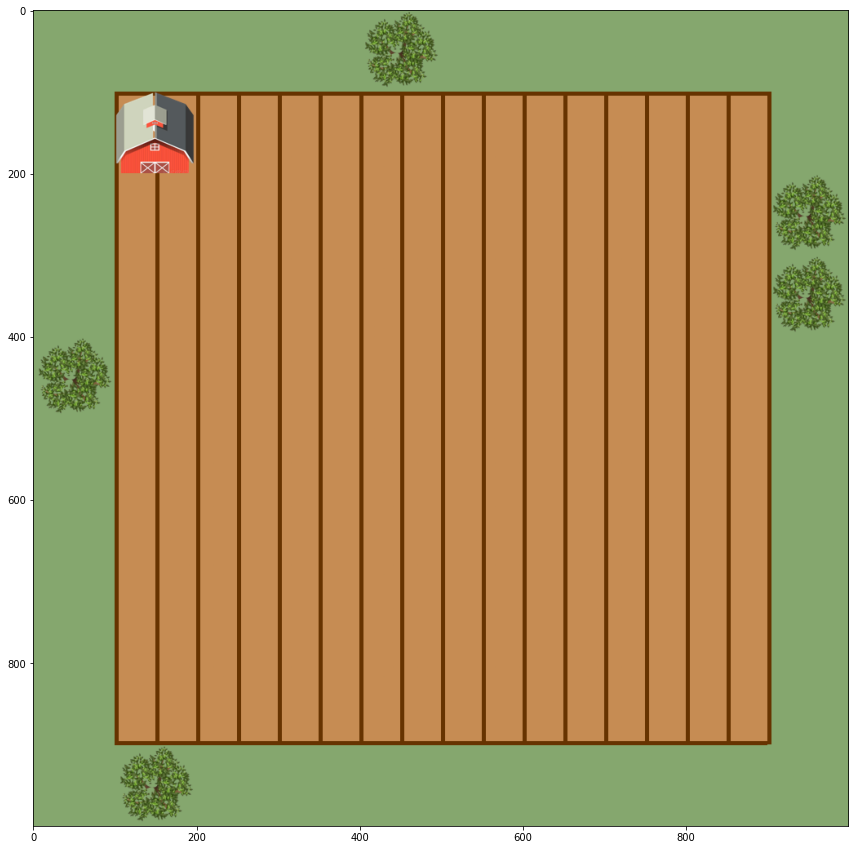

In [16]:
import matplotlib.pyplot as plt

img = plt.imread("gym_cabworld/images/small_map_gen.png")
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img)